<h2>Bước 1: Load dữ liệu</h2>



In [1]:
import tensorflow as tf
import keras

In [2]:
tf.__version__

'2.4.1'

In [3]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_val = X_train[:10000]
Y_val = Y_train[:10000]
X_train = X_train[10000:]
Y_train = Y_train[10000:]

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[1], 1)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


<h2>Bước 2: Kiểm tra phân phối số quan sát trên các nhóm <h2>

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def _plot_bar(data, title = 'Number observations of each class'):
    values, count = np.unique(data, return_counts=True)
    values_lab = [str(i) for i in values]
    plt.bar(values_lab, count)
    plt.xlabel('Class')
    plt.ylabel('Number observations')
    plt.title(title)
    
    for i in range(len(values)): # your number of bars
        plt.text(x = values[i] - 0.5, #takes your x values as horizontal positioning argument 
        y = count[i]+1, #takes your y values as vertical positioning argument 
        s = count[i], # the labels you want to add to the data
        )


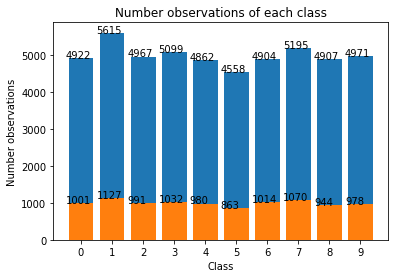

In [10]:
_plot_bar(Y_train)
_plot_bar(Y_val)

<p>Do input của mạng LeNet có kích thước 32 x 32 nên ta cần padding thêm các chiều để có kích thước là 32 x 32</p>

In [11]:
X_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
X_val = np.pad(X_val, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
X_test = np.pad(X_test, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
# (0,0) đầu tiên là thêm số lượng ảnh
# (2,2) thứ nhất là tăng chiều cao của ảnh
# (2,2) thứ hai là tăng chiều rộng của ảnh
# (0,0) cuối cùng là tăng độ sâu của ảnh

In [12]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)
(10000, 32, 32, 1)


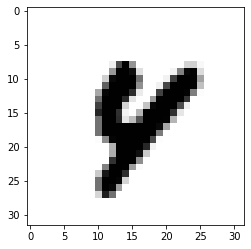

In [25]:
#plt.imshow(np.squeeze(X_train[np.random.randint(50000)], axis=2), cmap=plt.cm.binary)
plt.imshow(X_train[np.random.randint(50000)].reshape(32, 32), cmap=plt.cm.binary)

In [26]:
from tensorflow.keras.layers import Flatten, Dense, Input, Activation, Conv2D, MaxPooling2D, Reshape, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential, Model

def _Lenet_No_BatchNorm():
  inp = Input(shape=(32, 32, 1))
  conv1 = Conv2D(
      filters=4,
      kernel_size=5,
      padding='valid',
      strides=1,
      activation='relu')(inp)

  maxpool1 = MaxPooling2D(
      pool_size=2,
      strides=2
  )(conv1)

  conv2 = Conv2D(
      filters=16,
      kernel_size=5,
      padding='valid',
      strides=1,
      activation='relu')(maxpool1)

  maxpool2 = MaxPooling2D(
      pool_size=2,
      strides=2
  )(conv2)

  conv3 = Conv2D(
      filters=64,
      kernel_size=5,
      padding='valid',
      strides=1,
      activation='relu')(maxpool2)

  flatten = Flatten()(conv3)
  dense1 = Dense(units=64, activation='relu')(flatten)
  dense2 = Dense(units=32, activation='relu')(dense1)
  dense3 = Dense(10, activation='sigmoid')(dense2)
  output = Activation('softmax')(dense3)
  model = Model(inputs = inp, outputs=output)
  model.summary()
  return model

lenet_no_batchnorm = _Lenet_No_BatchNorm()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        1616      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 64)          25664     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0     

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
# Compile model
optimizer = Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=False)
lenet_no_batchnorm.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Khởi tạo model checkpoint
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
# Huấn luyện model
lenet_no_batchnorm.fit(X_train, Y_train,
              batch_size=256,
              # validation_data=[X_val, y_val],
              validation_split=0.2,
              epochs=10,
              shuffle=True,
              callbacks=[earlyStopping])

Epoch 1/10
157/157 [==============================] - 19s 115ms/step - loss: 2.3060 - accuracy: 0.2115 - val_loss: 1.8697 - val_accuracy: 0.5726
Epoch 2/10
157/157 [==============================] - 18s 113ms/step - loss: 1.8160 - accuracy: 0.6483 - val_loss: 1.7687 - val_accuracy: 0.7224
Epoch 3/10
157/157 [==============================] - 18s 113ms/step - loss: 1.7733 - accuracy: 0.7179 - val_loss: 1.7845 - val_accuracy: 0.7042
Epoch 4/10
157/157 [==============================] - 18s 113ms/step - loss: 1.7890 - accuracy: 0.6913 - val_loss: 1.8238 - val_accuracy: 0.5835


In [29]:
from tensorflow.keras.layers import Flatten, Dense, Input, Activation, Conv2D, MaxPooling2D, Reshape, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential, Model

def _Lenet_BatchNorm():
  inp = Input(shape=(32, 32, 1))
  conv1 = Conv2D(
      filters=4,
      kernel_size=5,
      padding='valid',
      strides=1,
      activation='relu')(inp)

  batch_norm1 = BatchNormalization()(conv1)

  maxpool1 = MaxPooling2D(
      pool_size=2,
      strides=2
  )(batch_norm1)

  conv2 = Conv2D(
      filters=16,
      kernel_size=5,
      padding='valid',
      strides=1,
      activation='relu')(maxpool1)

  batch_norm2 = BatchNormalization()(conv2)

  maxpool2 = MaxPooling2D(
      pool_size=2,
      strides=2
  )(batch_norm2)

  conv3 = Conv2D(
      filters=64,
      kernel_size=5,
      padding='valid',
      strides=1,
      activation='relu')(maxpool2)

  flatten = Flatten()(conv3)
  dense1 = Dense(units=64, activation='relu')(flatten)
  dense2 = Dense(units=32, activation='relu')(dense1)
  dense3 = Dense(10, activation='sigmoid')(dense2)
  output = Activation('softmax')(dense3)
  model = Model(inputs = inp, outputs=output)
  model.summary()
  return model

lenet_batchnorm = _Lenet_BatchNorm()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 4)         16        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        1616      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0   

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
# Compile model
optimizer = Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=False)
lenet_batchnorm.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Khởi tạo model checkpoint
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
# Huấn luyện model
lenet_batchnorm.fit(X_train, Y_train,
              batch_size=256,
              # validation_data=[X_val, y_val],
              validation_split=0.2,
              epochs=10,
              shuffle=True,
              callbacks=[earlyStopping])

Epoch 1/10
157/157 [==============================] - 26s 160ms/step - loss: 1.6600 - accuracy: 0.8113 - val_loss: 1.4860 - val_accuracy: 0.9707
Epoch 2/10
157/157 [==============================] - 25s 160ms/step - loss: 1.4832 - accuracy: 0.9732 - val_loss: 1.4788 - val_accuracy: 0.9796
Epoch 3/10
157/157 [==============================] - 25s 160ms/step - loss: 1.4778 - accuracy: 0.9782 - val_loss: 1.4832 - val_accuracy: 0.9726
Epoch 4/10
157/157 [==============================] - 25s 160ms/step - loss: 1.4755 - accuracy: 0.9819 - val_loss: 1.4756 - val_accuracy: 0.9791
Epoch 5/10
157/157 [==============================] - 25s 161ms/step - loss: 1.4739 - accuracy: 0.9829 - val_loss: 1.4776 - val_accuracy: 0.9766
Epoch 6/10
157/157 [==============================] - 25s 161ms/step - loss: 1.4770 - accuracy: 0.9795 - val_loss: 1.4821 - val_accuracy: 0.9692
